# Softmax 

```python
def softmax(scores: list[float]) -> list[float]:
```

위와 같이 정의하는 함수를 Python의 Type Hinting 이라고 합니다. 타입 힌팅은 함수 인자와 반환값의 데이터 타입을 명시적으로 지정하는 방법입니다. 
이를 통해 코드의 가독성을 높이고 , 개발자가 인자와 반환값의 타입을 쉽게 이해할 수 있도록 돕습니다.

소프트맥스 함수는 다음과 같이 정의됩니다:

$$
\sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

여기서:
- \( z \)는 입력 벡터입니다.
- \( z_i \)는 입력 벡터의 i번째 원소입니다.
- \( K \)는 입력 벡터의 원소 개수입니다.
- \( \sigma(z)_i \)는 소프트맥스 함수의 출력 벡터의 i번째 원소입니다.


In [2]:
import math 

def softmax(scores: list[float]) -> list[float]:
    # 각 score에 대해 지수(exponnential)를 계산
    exp_scores = [math.exp(score) for score in scores]

    # 지수 값들의 합을 계산 
    sum_exp_scores = sum(exp_scores)

    # 각 지수 값을 지수 값들의 합으로 나눠 소프트맥스 확률 계산 
    softmax_scores = [exp_score / sum_exp_scores for exp_score in exp_scores]

    return softmax_scores

# Softmax function의 특징 

소프트맥스 함수의 출력은 확률 분포를 형성합니다. 즉, 모든 출력 값은 0과 1사이의 값을 가지며 출력 값들의 합은 항상 1입니다. 
큰 값은 더 큰 확률을 가지게 하고 작은 값은 더 작은 확률을 가지게 하여 입력 벡터의 상대적 크기를 반영합니다. 

보통 다중 클래스 분류 문제(Multi class classification)에서 유용하게 사용되고 , 인공신경망의 출력층에 자주 나타납니다. 

In [4]:
import math

def softmax(scores: list[float]) -> list[float]:
    exp_scores = [math.exp(score) for score in scores]
    sum_exp_scores = sum(exp_scores)
    probabilities = [round(score / sum_exp_scores, 4) for score in exp_scores]
    return probabilities

In [6]:
scores = [1.0, 2.0, 3.0]
softmax_scores = softmax(scores)
print(softmax_scores)  # [0.09003057, 0.24472847, 0.66524096]

[0.09, 0.2447, 0.6652]


# 소프트맥스 그래프 그리기

/home/minyoungxi/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


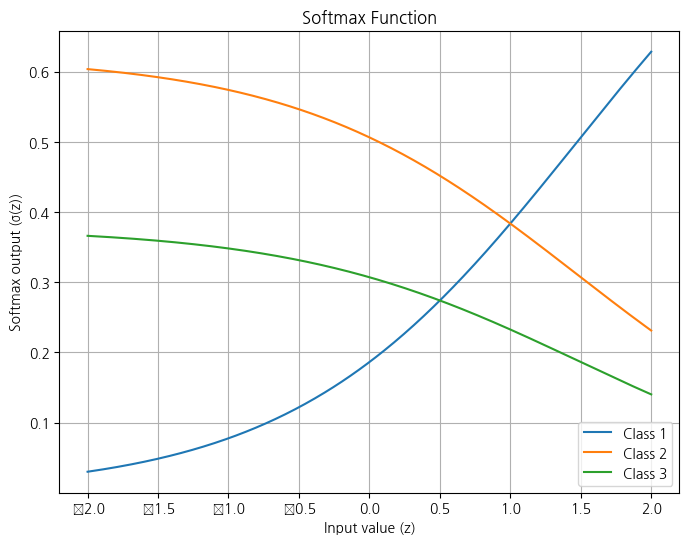

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

def softmax(scores: list[float]) -> list[float]:
    # 각 score에 대해 지수(exponential)를 계산
    exp_scores = [math.exp(score) for score in scores]
    
    # 지수 값들의 합을 계산 
    sum_exp_scores = sum(exp_scores)
    
    # 각 지수 값을 지수 값들의 합으로 나눠 소프트맥스 확률 계산 
    softmax_scores = [exp_score / sum_exp_scores for exp_score in exp_scores]
    
    return softmax_scores

# 그래프를 그리기 위한 코드
def plot_softmax():
    x = np.linspace(-2.0, 2.0, 400)  # 입력 범위
    scores = [x, np.ones_like(x), 0.5 * np.ones_like(x)]  # 세 개의 다른 입력 벡터
    
    # 각 입력 벡터에 대해 소프트맥스 계산
    softmax_results = [softmax(list(score)) for score in zip(*scores)]
    softmax_results = np.array(softmax_results).T  # 그래프를 그리기 위해 전치(transpose)

    plt.figure(figsize=(8, 6))
    for i, result in enumerate(softmax_results):
        plt.plot(x, result, label=f'Class {i+1}')
    
    plt.title('Softmax Function')
    plt.xlabel('Input value (z)')
    plt.ylabel('Softmax output (σ(z))')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_softmax()
